In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [59]:
#settting  the datadir path
datadir = 'Diagnosis of Diabetic Retinopathy/train'

In [60]:
CATEGORIES=['DR','No_DR']

In [61]:
img_size = 100

# just small understanding and how it works about cv2.IMREAD_GRAYSCALE

`cv2.IMREAD_GRAYSCALE` is a **flag** you pass to OpenCV’s `cv2.imread()` to tell it **how to load an image**.

### What it does

When you use `cv2.IMREAD_GRAYSCALE`, OpenCV:

* Loads the image
* **Converts it to grayscale**
* Returns a **2D array** (one channel instead of three)

So instead of color (BGR), you get **shades of gray** only.

---

### Basic syntax

```python
import cv2

img = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
```

---

### What happens internally

* A normal color image has **3 channels**: Blue, Green, Red (BGR)
* Grayscale has **1 channel**
* OpenCV combines the color channels using a weighted formula (roughly):

  ```
  Gray = 0.299*R + 0.587*G + 0.114*B
  ```

This keeps brightness looking natural to the human eye 👀

---

### Difference vs normal `imread`

```python
color = cv2.imread("image.jpg")                 # Shape: (H, W, 3)
gray  = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Shape: (H, W)
```

---

### Why use grayscale?

Grayscale is commonly used for:

* Face detection
* Edge detection (Canny)
* Thresholding
* Image processing & computer vision tasks
* Faster processing (less data)

---

### Visual example

```python
cv2.imshow("Grayscale Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

---

### Quick summary

* `cv2.IMREAD_GRAYSCALE` → loads image in **black & white**
* Removes color information
* Returns a **single-channel image**
* Useful for analysis, not visualization

If you want, I can also explain:

* Difference between `IMREAD_GRAYSCALE` and `cvtColor`
* How pixel values look in grayscale
* When **not** to use grayscale


In [62]:
#lets creating training data
training_data = []
def create_training_data():
    for i in CATEGORIES:
        #join our datadir and categories taking one by one 
        path = os.path.join(datadir,i)
        #taking class_num for label (DR--->0,No_DR--->1)
        class_num = CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                #grayscaling our image 
                grayscale_img = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                #resizing our image 
                resize_img = cv2.resize(grayscale_img,(img_size,img_size))
                training_data.append([resize_img,class_num])
            except Exception as e:
                pass
    
                
            

# #lets creating training data
# training_data = []
# def create_training_data():
#     for i in CATEGORIES:
#         #join our datadir and categories taking one by one 
#         path = os.path.join(datadir,i)
#         #taking class_num for label (DR--->0,No_DR--->1)
#         class_num = CATEGORIES.index(i)
#         for img in os.listdir(path):
#             try:
#                 #grayscaling our image 
#                 grayscale_img = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#                 #resizing our image 
#                 resize_img = cv2.resize(grayscale_img,(img_size,img_size))
#                 training_data.append([resize_img,class_num])
#             except Exception as e:
#                 pass
#     .....in training data how data resize img,class_num look like...okay you said after grayscale is my img become 2d? then in again dimension in resize i think no? okay in resize img,class_num i put it into list then what is it 3d

# Understanding the upper code

Good question — you’re *very close*, just mixing up **where the dimensions change** 👍
Let’s walk through it **slowly and clearly**.

---

## 1️⃣ After `IMREAD_GRAYSCALE`

```python
grayscale_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
```

* Original color image → shape:

  ```
  (height, width, 3)
  ```
* **After grayscale** → shape:

  ```
  (height, width)
  ```

So yes ✅ **grayscale image is 2D**.

Example:

```python
print(grayscale_img.shape)
# (512, 512)
```

---

## 2️⃣ After `cv2.resize`

```python
resize_img = cv2.resize(grayscale_img, (img_size, img_size))
```

⚠️ **Resize does NOT add a new dimension**

It only changes **height and width**.

So shape becomes:

```
(img_size, img_size)
```

Example:

```python
print(resize_img.shape)
# (100, 100)  ← still 2D
```

👉 **Still 2D**, NOT 3D.

---

## 3️⃣ What is inside `training_data`?

```python
training_data.append([resize_img, class_num])
```

Each element of `training_data` looks like this:

```
[
  resize_img,   # 2D NumPy array (image)
  class_num     # integer (label)
]
```

### Example of ONE item:

```python
training_data[0]
```

Conceptually:

```
[
  [[12, 34, 56, ...],   ← pixel values
   [23, 45, 67, ...],
   ...
  ], 
  0                    ← class label
]
```

---

## 4️⃣ Is `training_data` 3D?

❌ **No, not yet**

Right now:

* `resize_img` → **2D**
* `class_num` → **scalar**
* `training_data` → **list of mixed objects**

Python doesn’t call this 3D — it’s just:

```
List → [image_array, label]
```

---

## 5️⃣ When does it become 3D or 4D? 🔥

This happens **later**, usually before training the model.

### Convert to NumPy array

```python
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)
```

Now:

```
X.shape = (num_samples, img_size, img_size)
```

This is **3D** ✔️

---

## 6️⃣ CNNs expect 4D input

Most CNNs expect:

```
(samples, height, width, channels)
```

Since grayscale has **1 channel**, we add it:

```python
X = X.reshape(-1, img_size, img_size, 1)
```

Now:

```
X.shape = (num_samples, img_size, img_size, 1)
```

🎯 **This is 4D**

---

## 7️⃣ Final mental model (IMPORTANT)

| Stage                  | Shape                      |
| ---------------------- | -------------------------- |
| Read color image       | (H, W, 3)                  |
| After grayscale        | (H, W)                     |
| After resize           | (img_size, img_size)       |
| After stacking samples | (N, img_size, img_size)    |
| Before CNN             | (N, img_size, img_size, 1) |

---

### Short answer to your confusion

> *“resize img, class_num I put it into list then what is it 3D?”*

👉 **No**

* Image is **2D**
* List is just a container
* It becomes **3D only after stacking images into NumPy array**
* **4D only after adding channel dimension**

If you want, I can:

* Draw this as a diagram 🧠
* Show `print(shape)` at each step
* Explain why CNN needs 4D input

Just tell me 🙂


In [63]:
create_training_data()

In [64]:
#shuffling training data 
import random

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]], dtype=uint8), 1]
[array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8), 0]
[array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8), 0]
[array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8), 1]
[array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       

# why shuffling 
Short answer: **to stop your model from learning in a biased / wrong order**.

Now the clear explanation 👇

---

## Why we **shuffle** training data

Your data is loaded like this:

```text
DR images first
then No_DR images
```

So `training_data` looks like:

```
[image, 0]
[image, 0]
[image, 0]
...
[image, 1]
[image, 1]
[image, 1]
...
```

⚠️ This order is **dangerous** for training.

---

## What happens if you DON’T shuffle ❌

When training:

* Model sees **only DR** images first
* Then suddenly **only No_DR** images
* The model starts **memorizing order**, not features

This can cause:

* Poor generalization
* Slow or unstable learning
* Bias toward the class seen first
* Bad accuracy on new data

---

## What shuffling fixes ✅

```python
import random
random.shuffle(training_data)
```

After shuffling:

```
[image, 1]
[image, 0]
[image, 1]
[image, 0]
...
```

Now:

* Classes are **mixed**
* Each batch has **variety**
* Model learns **real patterns**, not order

---

## Think of it like studying 📚

If you study:

```
Math for 3 hours → Physics for 3 hours
```

Your brain struggles to switch.

If you study:

```
Math → Physics → Math → Physics
```

You learn **better**.

Same idea for neural networks 🧠

---

## When exactly should you shuffle?

✔️ After creating `training_data`
✔️ Before splitting into `X` and `y`
✔️ Often again every epoch (Keras does this automatically)

---

## Quick summary

* Shuffling **prevents bias**
* Improves **generalization**
* Stabilizes **training**
* Essential when data is stored class-wise

If you want, I can explain:

* Shuffling vs stratification
* Batch shuffling in CNNs
* What happens inside Keras during `fit()`

Just say 👍


In [65]:
#takking feature and labels 
x = []
y = []
for features,labels in training_data:
    x.append(features)
    y.append(labels)

# #my question is "here we take feature into a list is our image become 3d"
# #ans-No
# How ?
# training_data----->
# [
#   [2D_image, label],
#   [2D_image, label],
#   ...
# ]    

# After when you take feature our feature it add one list in overall image 
# 2️⃣ Inside this code
# x = []
# y = []

# for features, labels in training_data:
#     x.append(features)
#     y.append(labels)
# x → list of 2D images
# y → list of labels
# So conceptually:

# x = [
#   2D_image,
#   2D_image,
#   2D_image,
#   ...
# ]

# x=[]
# mean taking all 2d image into a list

Yes 👍 **right here is where it *starts* becoming 3D — but let’s be precise**, because this confusion is very common.

---

## Step-by-step what’s happening

### 1️⃣ Before this loop

Each image (`features`) is **2D**:

```
(img_size, img_size)
```

`training_data` is:

```
[
  [2D_image, label],
  [2D_image, label],
  ...
]
```

Still **NOT 3D** yet.

---

### 2️⃣ Inside this code

```python
x = []
y = []

for features, labels in training_data:
    x.append(features)
    y.append(labels)
```

* `x` → list of **2D images**
* `y` → list of labels

So conceptually:

```
x = [
  2D_image,
  2D_image,
  2D_image,
  ...
]
```

👉 **This is still just a Python list**, not officially “3D” yet.

---

### 3️⃣ The key moment 🔑 (VERY IMPORTANT)

Only when you do this:

```python
x = np.array(x)
```

NOW the magic happens.

If you have:

* `N` images
* each image shape `(img_size, img_size)`

Then:

```
x.shape = (N, img_size, img_size)
```

🎯 **Now it is 3D**

---

## Why this is considered 3D

Because:

* Dimension 1 → number of images (samples)
* Dimension 2 → height
* Dimension 3 → width

```
(samples, height, width)
```

---

## 4️⃣ CNN still needs ONE more dimension

Grayscale images have **1 channel**, so we add it:

```python
x = x.reshape(-1, img_size, img_size, 1)
```

Now:

```
x.shape = (N, img_size, img_size, 1)
```

🔥 **This is 4D (what CNN expects)**

---

## Final mental checklist ✅

| Code step              | Dimension |
| ---------------------- | --------- |
| Read grayscale image   | 2D        |
| Resize                 | 2D        |
| Append to list         | still 2D  |
| Convert to NumPy array | **3D**    |
| Add channel dim        | **4D**    |

---

### One-line answer to your question

> *“is here images become 3d”*

👉 **Not yet**
👉 **They become 3D only after `x = np.array(x)`**

If you want, I can show:

* `print(x.shape)` at each step
* Why CNN crashes without channel dim
* Difference between grayscale & RGB shapes


In [66]:
y = np.array(y)

In [67]:
x = np.array(x).reshape(-1,img_size,img_size,1)

In [68]:
validation_data = []
datadir_val = 'Diagnosis of Diabetic Retinopathy/valid/'

In [69]:
def create_validation_data():
    for i in CATEGORIES:
        path = os.path.join(datadir_val,i)
        class_num = CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                grayscale = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                resize_img = cv2.resize(grayscale,(img_size,img_size))
                validation_data.append([resize_img,class_num])
            except Exception as e:
                pass
            

In [70]:
create_validation_data()

In [71]:
len(validation_data)

531

In [72]:
#taking feature and labels
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)
    

[array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8), 0]
[array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1]
[array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8), 0]
[array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,

In [73]:
#taking feature and labels
x_val = []
y_val = []
for features,labels in validation_data:
    x_val.append(features)
    y_val.append(labels)

In [74]:
y_val = np.array(y_val)
x_val = np.array(x_val).reshape(-1,img_size,img_size,1)

In [75]:
#lets scaling our feature
x = x/255.0
x_val = x_val/255.0

In [76]:
x.shape[1:]

(100, 100, 1)

In [77]:
x

array([[[[0.01568627],
         [0.01568627],
         [0.01568627],
         ...,
         [0.01568627],
         [0.01568627],
         [0.01568627]],

        [[0.01568627],
         [0.01568627],
         [0.01568627],
         ...,
         [0.01568627],
         [0.01568627],
         [0.01568627]],

        [[0.01568627],
         [0.01568627],
         [0.01568627],
         ...,
         [0.01568627],
         [0.01568627],
         [0.01568627]],

        ...,

        [[0.01568627],
         [0.01568627],
         [0.01568627],
         ...,
         [0.01568627],
         [0.01568627],
         [0.01568627]],

        [[0.01568627],
         [0.01568627],
         [0.01568627],
         ...,
         [0.01568627],
         [0.01568627],
         [0.01568627]],

        [[0.01568627],
         [0.01568627],
         [0.01568627],
         ...,
         [0.01568627],
         [0.01568627],
         [0.01568627]]],


       [[[0.00784314],
         [0.00784314],
         [0.00

In [23]:
x.shape[1:]

(100, 100, 1)

In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense
import pickle

In [24]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape = x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

C:\Users\ddeba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,638,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(x,y,batch_size=4,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
519/519 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8757 - loss: 0.2963 - val_accuracy: 0.9040 - val_loss: 0.2141
Epoch 2/10
519/519 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.9210 - loss: 0.2158 - val_accuracy: 0.8983 - val_loss: 0.2225
Epoch 3/10
519/519 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.9220 - loss: 0.2149 - val_accuracy: 0.8983 - val_loss: 0.2397
Epoch 4/10
519/519 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9200 - loss: 0.2022 - val_accuracy: 0.9134 - val_loss: 0.2115
Epoch 5/10
519/519 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.9258 - loss: 0.1954 - val_accuracy: 0.8983 - val_loss: 0.2123
Epoch 6/10
519/519 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.9273 - loss: 0.1867 - val_accuracy: 0.9115 - val_loss: 0.2223
Epoch 7/10
519/519 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9355 - loss: 0.1779 - val_accuracy: 0.9171 - val_loss: 0.2032
Epoch 8/10
519/519 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.9359 - loss: 0.1680 - 

In [31]:
def prepare_img(image):
    grayscale = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    resize = cv2.resize(grayscale,(img_size,img_size))
    reshape = np.array(resize).reshape(-1,img_size,img_size,1)
    return reshape

In [39]:
image = 'Diagnosis of Diabetic Retinopathy/test/No_DR/0ae2dd2e09ea_png.rf.a4faf61bd46dc2930c51b3db7dba12cd.jpg'

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.99892527]]
1
No_DR


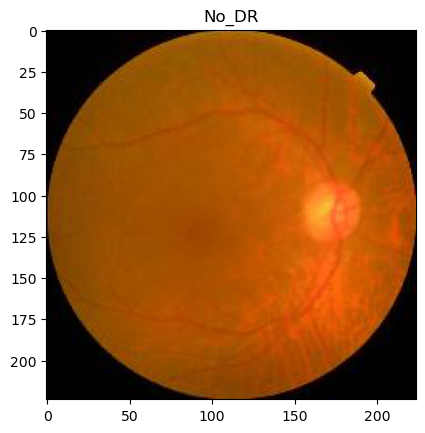

In [41]:
prediction = model.predict([prepare_img(image)/255.])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])
img = mpimg.imread(image)
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int(round(prediction[0][0]))])
plt.show()

In [43]:
#saving our model 
model.save('own-model.h5')

# Transfer Learning

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Example: your dataset
# X -> (N, img_size, img_size, 1) grayscale
# y -> (N,) labels

# If your X is grayscale, repeat channels to make 3-channel input
X_rgb = np.repeat(x, 3, axis=-1)  # Now shape (N, img_size, img_size, 3)

# Convert labels to categorical
y_cat = tf.keras.utils.to_categorical(y, num_classes=2)

# Load VGG16 base (without top layers)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Build your own top model
x = vgg_base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(2, activation='softmax')(x)  # 2 classes

# Combine
model = Model(inputs=vgg_base.input, outputs=predictions)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    X_rgb, y_cat,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    shuffle=True
)

# Model summary
model.summary()


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 559ms/step - accuracy: 0.7867 - loss: 0.5637 - val_accuracy: 0.8486 - val_loss: 0.3059
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 29s 553ms/step - accuracy: 0.8910 - loss: 0.2827 - val_accuracy: 0.9207 - val_loss: 0.2467
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 545ms/step - accuracy: 0.9078 - loss: 0.2416 - val_accuracy: 0.9303 - val_loss: 0.1843
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 545ms/step - accuracy: 0.9145 - loss: 0.2217 - val_accuracy: 0.9351 - val_loss: 0.1781
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 549ms/step - accuracy: 0.9120 - loss: 0.2238 - val_accuracy: 0.9399 - val_loss: 0.1674
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 548ms/step - accuracy: 0.9133 - loss: 0.2166 - val_accuracy: 0.9327 - val_loss: 0.1656
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 547ms/step - accuracy: 0.9241 - loss: 0.2192 - val_accuracy: 0.9423 - val_loss: 0.1636
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 29s 551ms/step - accuracy: 0.9325 - loss: 0.2133 - val_accu

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 22,189,640 (84.65 MB)

 Trainable params: 2,491,650 (9.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,983,302 (19.01 MB)

###### Step 1 Proper image preparation

In [81]:
import cv2
import numpy as np

def prepare_img(img_path):
    # Read image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize
    img = cv2.resize(img, (img_size, img_size))

    # Normalize
    img = img / 255.0

    # Add channel dimension (1)
    img = img.reshape(1, img_size, img_size, 1)

    # Convert grayscale → RGB (required for VGG16)
    img = np.repeat(img, 3, axis=-1)

    return img


###### step-2 Predict Correctly

In [82]:
image_path = 'Diagnosis of Diabetic Retinopathy/test/No_DR/0b2ea8f268cf_png.rf.67217aed13eea5ea2bc2d7dda32aecda.jpg'

prediction = model.predict(prepare_img(image_path))

predicted_class = np.argmax(prediction)

print("Raw prediction:", prediction)
print("Predicted class index:", predicted_class)
print("Predicted label:", CATEGORIES[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Raw prediction: [[0.13765043 0.86234957]]
Predicted class index: 1
Predicted label: No_DR


##### step 3 display image with prediction


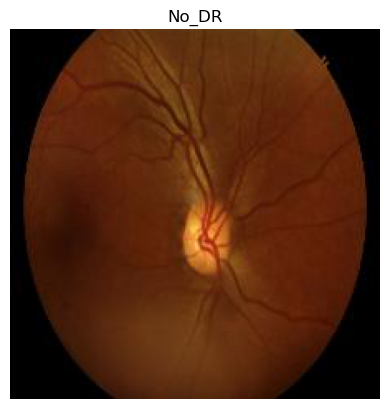

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(CATEGORIES[predicted_class])
plt.show()


In [ ]:
model.save('vgg-1